In [1]:
from scipy.io import loadmat
from pathlib import Path as P
import os
import mne
import matplotlib.pyplot as plt
# %matplotlib notebook


In [2]:
root = P("C:/Users/paull/Documents/GIT/BCI_MsC/notebooks")

dataset_folder = root / "BCI_Comp_IV_2a"
mat_files = list(dataset_folder.iterdir())

In [3]:
n = 1
data = loadmat(mat_files[0])
print(mat_files[0])
print("Keys:")
print(list(data.keys()))
data

C:\Users\paull\Documents\GIT\BCI_MsC\notebooks\BCI_Comp_IV_2a\A01E.mat
Keys:
['__header__', '__version__', '__globals__', 'data']


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Aug  7 13:06:57 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[array([[(array([[ 11.23046875, -27.24609375,   6.10351562, ...,   3.41796875,
          45.41015625, -12.6953125 ],
        [  9.5703125 , -22.55859375,   7.91015625, ...,   3.90625   ,
          45.41015625, -11.71875   ],
        [ 10.69335938, -26.12304688,   5.61523438, ...,  10.7421875 ,
          52.24609375,  -2.44140625],
        ...,
        [ 15.52734375,   8.3984375 ,  12.79296875, ..., -11.71875   ,
          37.109375  ,  13.18359375],
        [ 16.35742188,   9.08203125,  12.79296875, ...,  -1.953125  ,
          42.48046875,  19.04296875],
        [ 18.40820312,   6.59179688,  13.62304688, ...,  -4.39453125,
          37.59765625,  19.04296875]]), array([], shape=(0, 1), dtype=uint8), array([], shape=(0, 1), dtype=uint8), array([[250]], dtype=uint8), array([[array(['left hand'], dtype='<U9'),
         array(['right ha

In [4]:
s_data = data["data"][0]

In [5]:
def print_rec(obj, level=0, max_level=3):
    if level >=  max_level:
        return
    for x in obj:
            print("-"*level, obj.shape, len(obj))
            print_rec(x, level=level+1, max_level=max_level)
print_rec(s_data)

 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1
 (9,) 9
- (1, 1) 1
-- (1,) 1


In [6]:
s_data[3][0][0][7]

array([[22]], dtype=uint8)

(34291, 25)
(34459, 25)
(37040, 25)
(96735, 25)
(96735, 25)
(96735, 25)
(96735, 25)
(96735, 25)
(96735, 25)


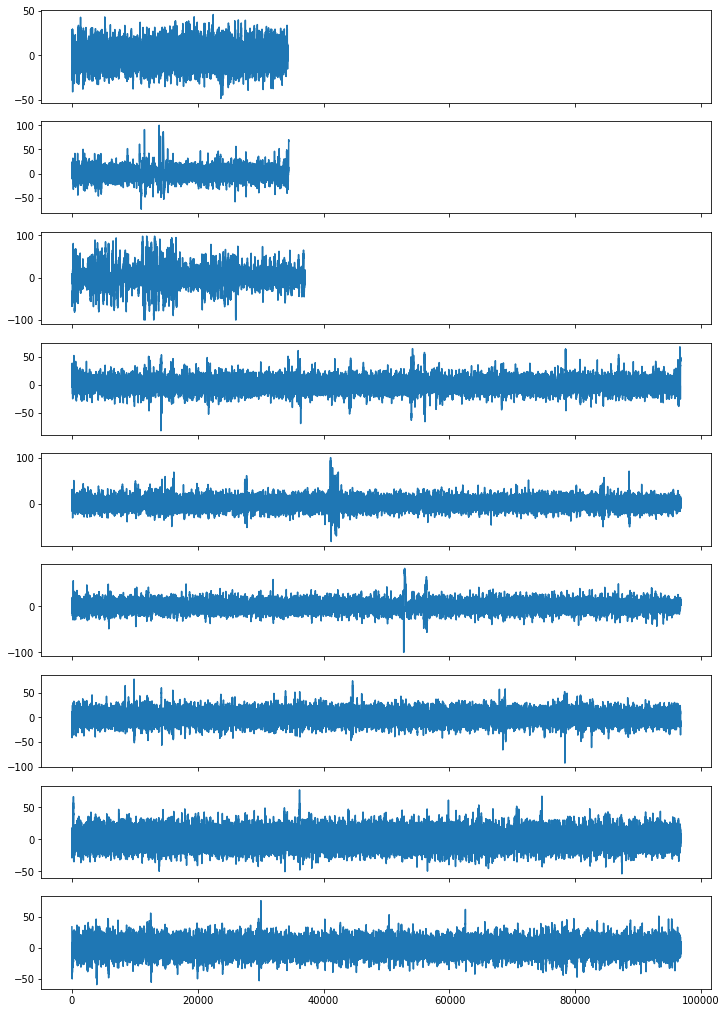

In [7]:
import matplotlib.pyplot as plt

c_n = 1
fig, axes = plt.subplots(9, 1, sharex=True, figsize=(12, 18))
for i in range(9):
    d = s_data[i][0][0][0]
    print(d.shape)
    axes[i].plot(d[:, c_n])

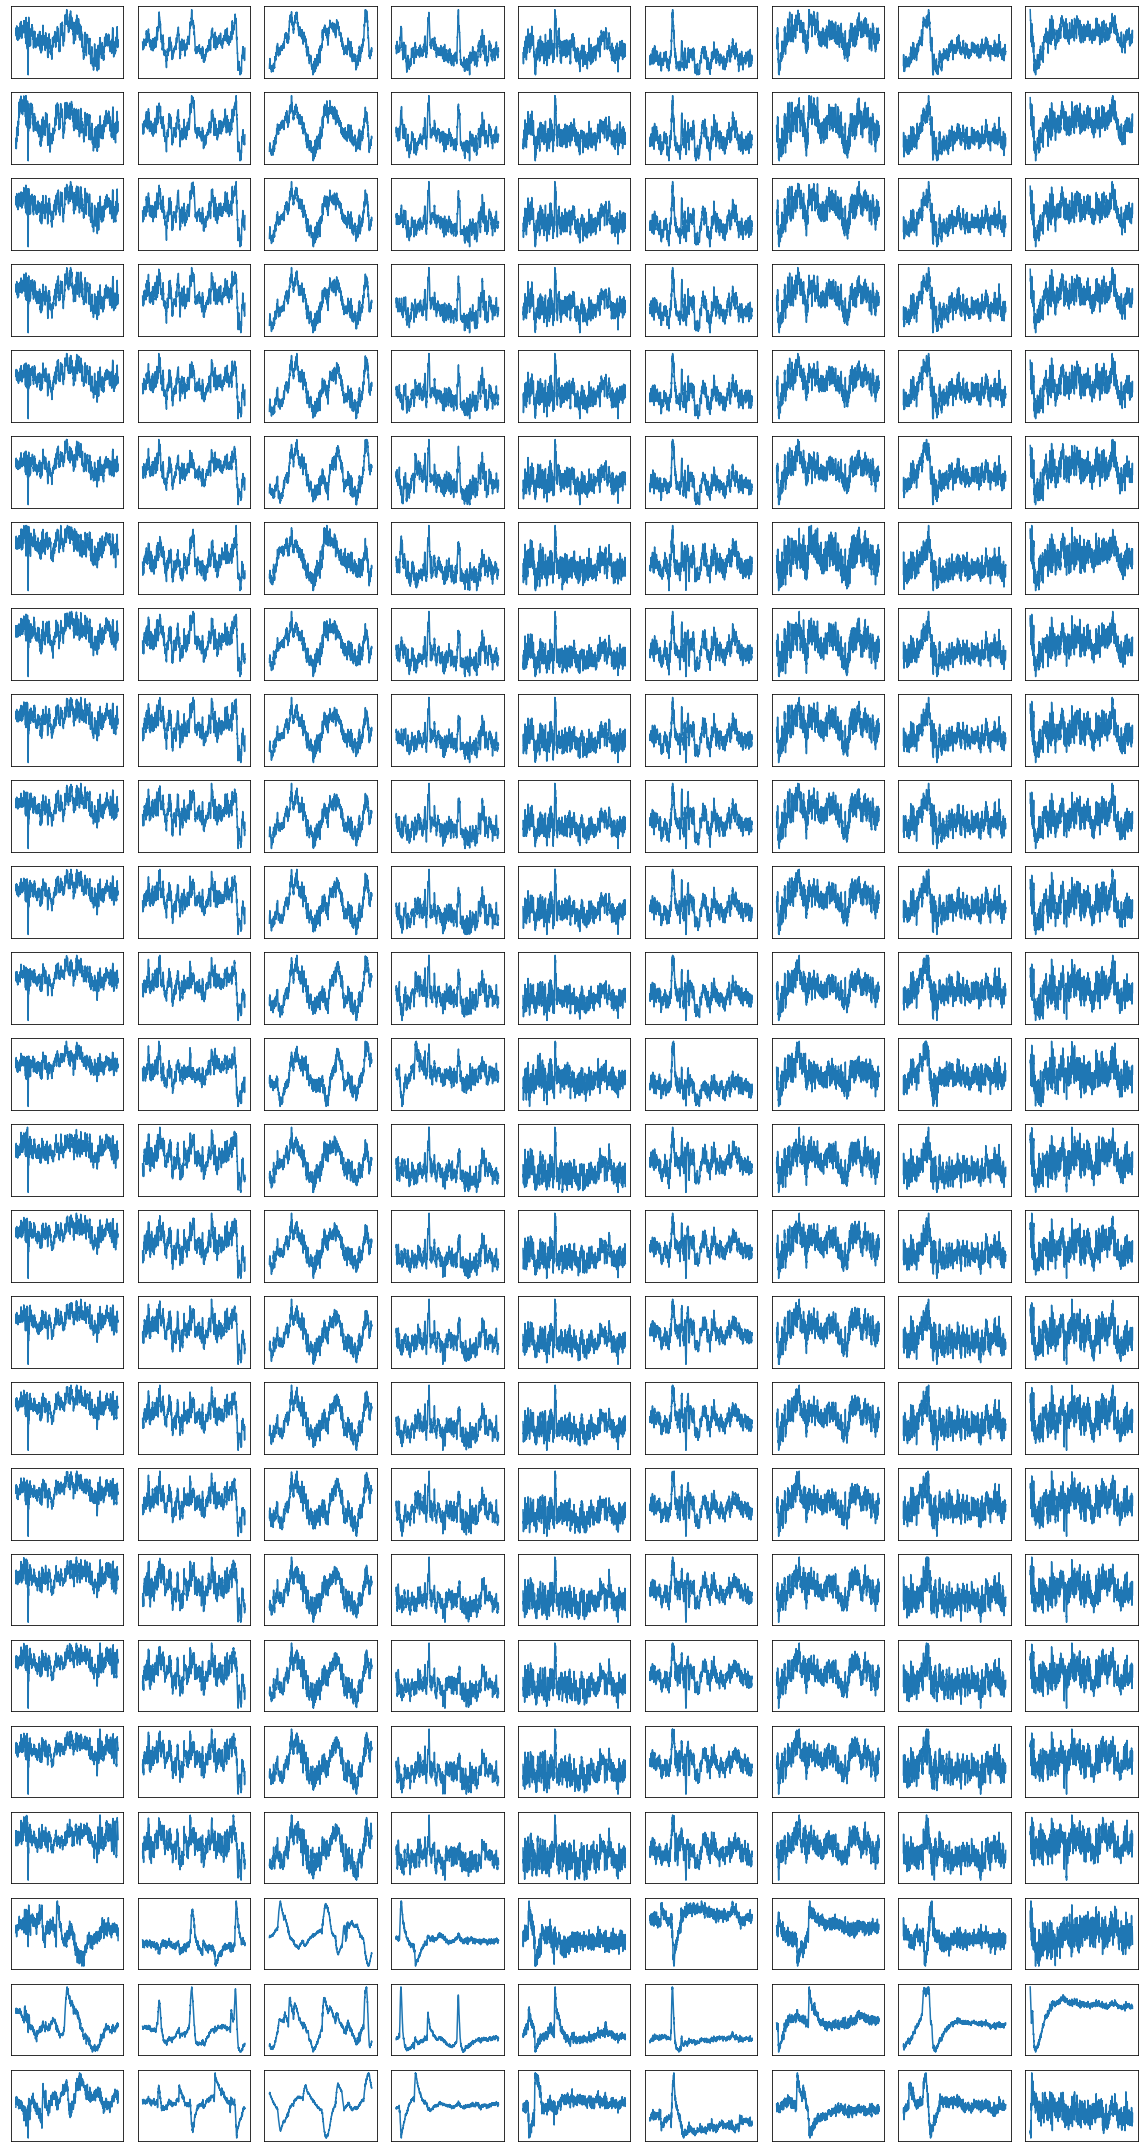

In [8]:
c_n = 1
fig, axes = plt.subplots(25, 9, figsize=(16, 30))
for i in range(9):
    d = s_data[i][0][0][0]
    for j in range(25):
        ax = axes[j, i]
        ax.plot(d[:1000, j])
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_xticks([], minor=True)
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_yticks([], minor=True)
plt.tight_layout()

In [240]:
from mne.io import read_raw_gdf

PRELOAD = False

filepath = root / "BCI_Comp_IV_2a/BCICIV_2a_gdf/A01T.gdf"
gdf_data = read_raw_gdf(filepath, preload=PRELOAD)

chs = gdf_data.ch_names

gdf_data = read_raw_gdf(
    filepath,
    preload=True,
    eog=["EOG-left", "EOG-central", "EOG-right"],
    exclude=[x for x in chs if "EOG" in x]
)


Extracting EDF parameters from C:\Users\paull\Documents\GIT\BCI_MsC\notebooks\BCI_Comp_IV_2a\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\paull\Documents\GIT\BCI_MsC\notebooks\BCI_Comp_IV_2a\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


C:\Users\paull\anaconda3\envs\bci\lib\site-packages\mne\io\edf\edf.py:1044: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
<ipython-input-240-085a5d96f96a>:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  gdf_data = read_raw_gdf(filepath, preload=PRELOAD)
C:\Users\paull\anaconda3\envs\bci\lib\site-packages\mne\io\edf\edf.py:1044: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
<ipython-input-240-085a5d96f96a>:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  gdf_data = read_raw_gdf(


In [75]:
gdf_data.get_data()

array([[-2.11425781e-05, -2.19238281e-05, -1.56250000e-05, ...,
         5.51757812e-06,  1.46484375e-06,  1.36718750e-06],
       [-2.36816406e-05, -2.39257812e-05, -1.97265625e-05, ...,
         1.04980469e-05,  3.07617188e-06,  3.51562500e-06],
       [-2.14843750e-05, -2.43164062e-05, -1.88476562e-05, ...,
         1.49414062e-05,  9.22851563e-06,  7.86132812e-06],
       ...,
       [-2.54394531e-05, -2.70996094e-05, -2.50976562e-05, ...,
         1.18652344e-05,  5.12695312e-06,  5.46875000e-06],
       [-2.49023437e-05, -2.63671875e-05, -2.42675781e-05, ...,
         1.06933594e-05,  4.68750000e-06,  6.20117187e-06],
       [-1.96777344e-05, -2.33398437e-05, -2.14843750e-05, ...,
         9.42382812e-06,  7.32421875e-07,  1.46484375e-06]])

In [11]:
import mne

def get_kwargs(m, is_extended=False):
    if is_extended:
        return dict(method=m, fit_params=dict(extended=True))
    return dict(method=m)

ica_kwargs_dict = {
    "fastica": get_kwargs("fastica"),
    "infomax": get_kwargs("infomax"),
    "picard": get_kwargs("picard"),
    "ext_infomax": get_kwargs("infomax", is_extended=True),
    "ext_picard": get_kwargs("picard", is_extended=True)
}

method = "ext_infomax"
n_components = 10

ica_transform = mne.preprocessing.ICA(n_components=n_components, **ica_kwargs_dict[method])
ica_transform = ica_transform.fit(gdf_data)

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 10 components
Computing Extended Infomax ICA
Fitting ICA took 217.4s.


In [247]:
x = raw_data[:, :]
x[x < -0.001].shape

(17600,)

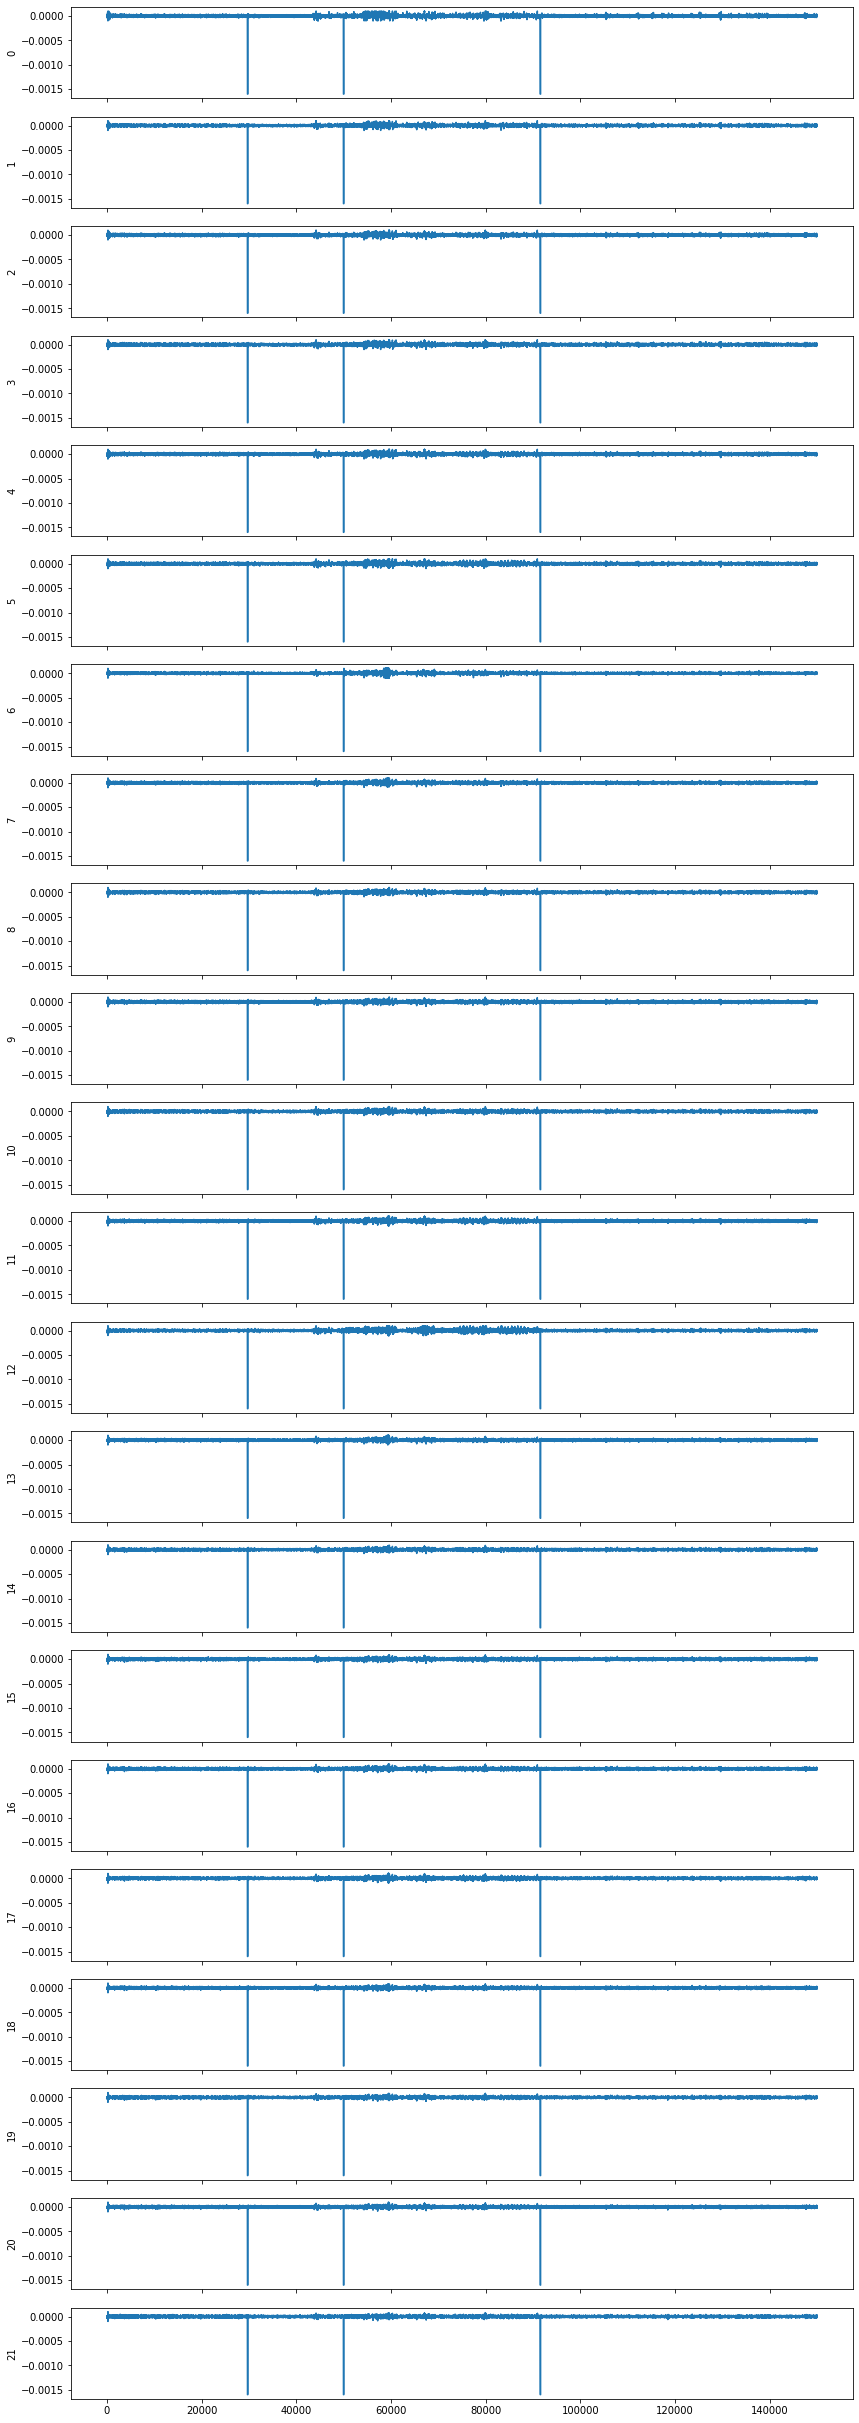

In [243]:
raw_data = gdf_data.get_data(reject_by_annotation="omit").T
n = raw_data.shape[1]
fig, axes = plt.subplots(n, 1, sharex=True, figsize=(14, n*2))
for i in range(n):
    axes[i].plot(raw_data[:150000, i])
    axes[i].set_ylabel(str(i))

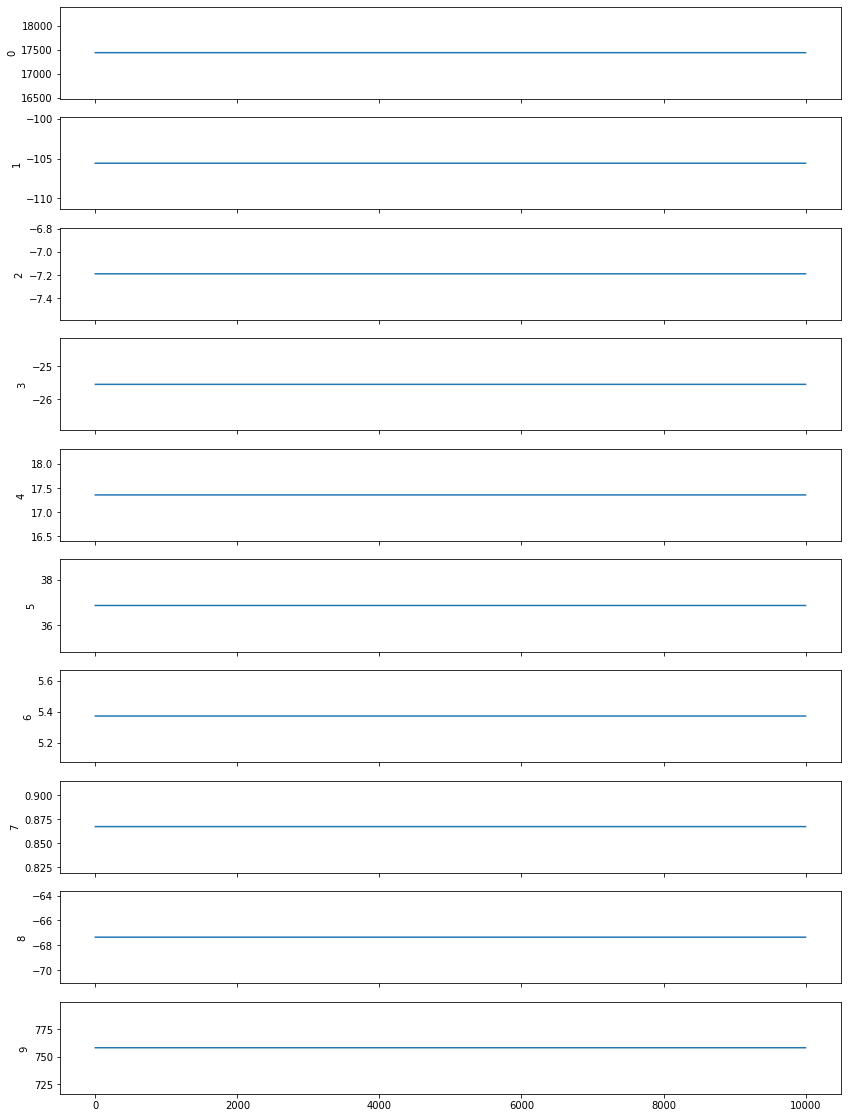

In [255]:
# gdf_data_ = gdf_data.copy()
# gdf_data_._data = np.ones((22, 10000))
data = ica_transform.get_sources(gdf_data_).get_data().T
n = data.shape[1]
fig, axes = plt.subplots(n, 1, sharex=True, figsize=(14, n*2))
for i in range(n):
    axes[i].plot(data[:50000, i])
    axes[i].set_ylabel(str(i))

In [219]:
gdf_data._raw_extras

[{'type': 'GDF',
  'subtype': 'GDF',
  'number': 1.99,
  'units': array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
         1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
         1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06]),
  'bytes_tot': 50,
  'ch_names': ['EEG-Fz',
   'EEG',
   'EEG',
   'EEG',
   'EEG',
   'EEG',
   'EEG',
   'EEG-C3',
   'EEG',
   'EEG-Cz',
   'EEG',
   'EEG-C4',
   'EEG',
   'EEG',
   'EEG',
   'EEG',
   'EEG',
   'EEG',
   'EEG',
   'EEG-Pz',
   'EEG',
   'EEG'],
  'data_offset': 6656,
  'dtype_byte': 2,
  'dtype_np': '<i2',
  'digital_max': array([2047., 2047., 2047., 2047., 2047., 2047., 2047., 2047., 2047.,
         2047., 2047., 2047., 2047., 2047., 2047., 2047., 2047., 2047.,
         2047., 2047., 2047., 2047., 2047., 2047., 2047.]),
  'exclude': [22, 23, 24],
  'gnd': array([nan, nan, nan], dtype=float32),
  'highpass': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
         0.5, 0.5, 0.

In [220]:
m

-0.0015999999999999999

In [98]:
import numpy as np

"""
276 0x0114 Idling EEG (eyes open)
277 0x0115 Idling EEG (eyes closed)
768 0x0300 Start of a trial
769 0x0301 Cue onset left (class 1)
770 0x0302 Cue onset right (class 2)
771 0x0303 Cue onset foot (class 3)
772 0x0304 Cue onset tongue (class 4)
783 0x030F Cue unknown
1023 0x03FF Rejected trial
1072 0x0430 Eye movements
32766 0x7FFE Start of a new run
"""
print(len(gdf_data.annotations))
print(set(gdf_data.annotations.duration))
print(np.unique(gdf_data.annotations.description, return_counts=True))
print(len(gdf_data.annotations.onset))
print(gdf_data.annotations.onset[4], gdf_data.annotations.duration[4])
print(max(gdf_data.annotations.onset))

603
{1.252, 166.248, 7.5, 81.084, 118.728, 0.004}
(array(['1023', '1072', '276', '277', '32766', '768', '769', '770', '771',
       '772'], dtype='<U5'), array([ 15,   1,   1,   1,   9, 288,  72,  72,  72,  72], dtype=int64))
603
199.82 0.004
2684.2


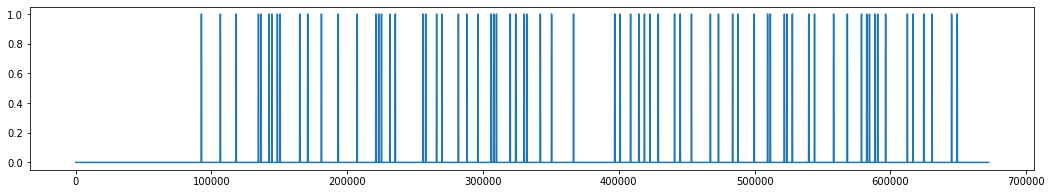

In [225]:
annotation_desc_dict = {
    276: "Idling EEG (eyes open)",
    277: "Idling EEG (eyes closed)",
    768: "Start of a trial",
    769: "Cue onset left (class 1)",
    770: "Cue onset right (class 2)",
    771: "Cue onset foot (class 3)",
    772: "Cue onset tongue (class 4)",
    783: "Cue unknown",
    1023: "Rejected trial",
    1072: "Eye movements",
    32766: "Start of a new run",
}

annotation_encode_dict = {
    276: 0,
    277: 1,
    768: 2,
    769: 3,
    770: 4,
    771: 5,
    772: 6,
    783: 7,
    1023: 8,
    1072: 9,
    32766: 10,
}
annotation_decode_dict = {v: k for k, v in annotation_encode_dict.items()}

def get_annotations(data):
    sr = data.info["sfreq"]
    n_samples = gdf_data._raw_extras[0]["n_records"]

    onsets = np.trunc(data.annotations.onset * sr).astype(np.uint32, casting="unsafe")
    durations = np.trunc(data.annotations.duration * sr).astype(np.uint32, casting="unsafe")
    
    desc = data.annotations.description.astype(np.uint32)
    labels_codes = np.vectorize(annotation_encode_dict.get)(desc)
    
    n_codes = len(annotation_encode_dict)
    labels = np.zeros((n_samples, n_codes))
    
    for code, onset, duration in zip(labels_codes, onsets, durations):
        labels[onset:onset+duration, code] = 1
    
    return labels

labels = get_annotations(gdf_data)
labels
plt.figure(figsize=(18, 3))
plt.plot(labels[:, 6])
# max(gdf_data.annotations.onset * 250), gdf_data.get_data().shape

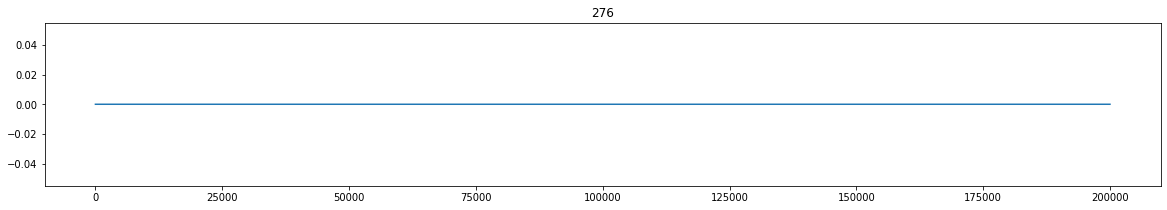

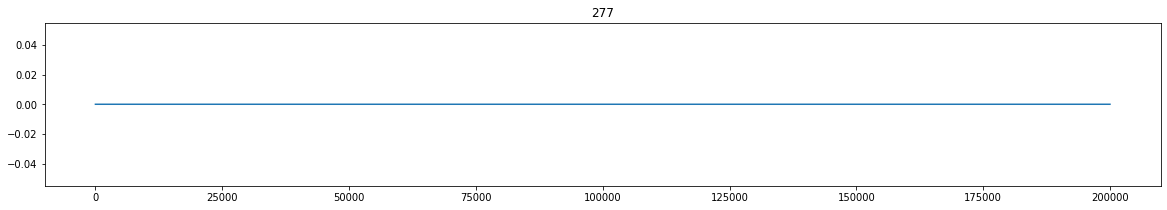

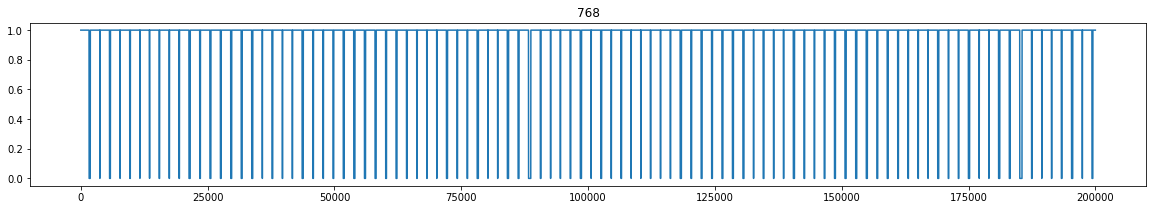

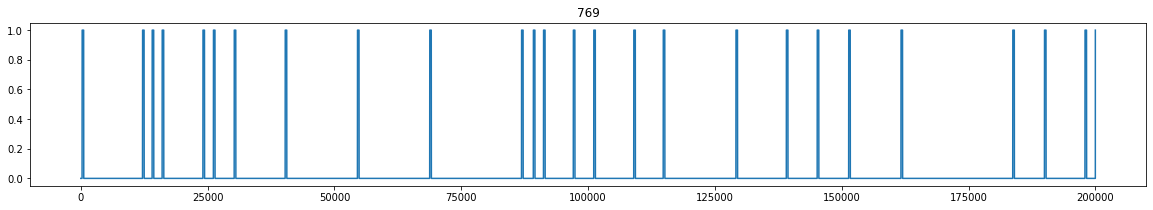

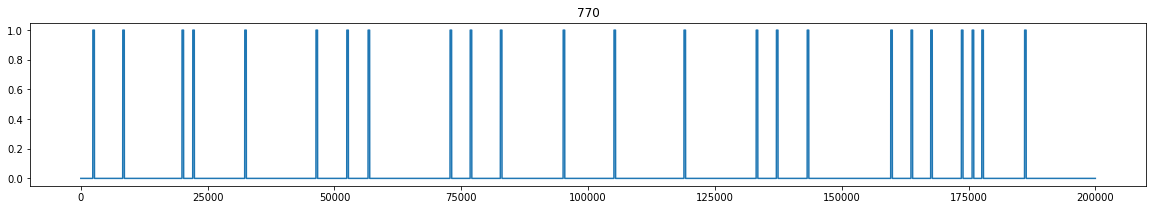

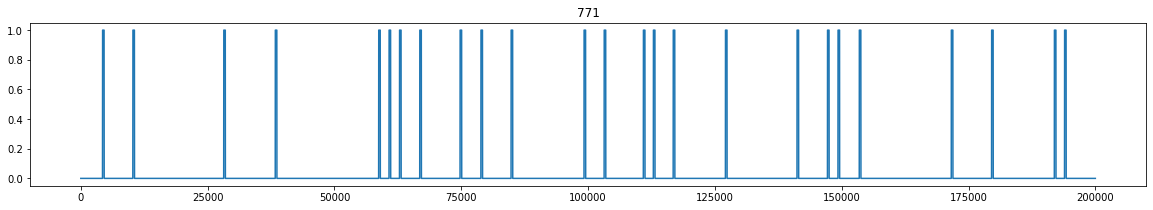

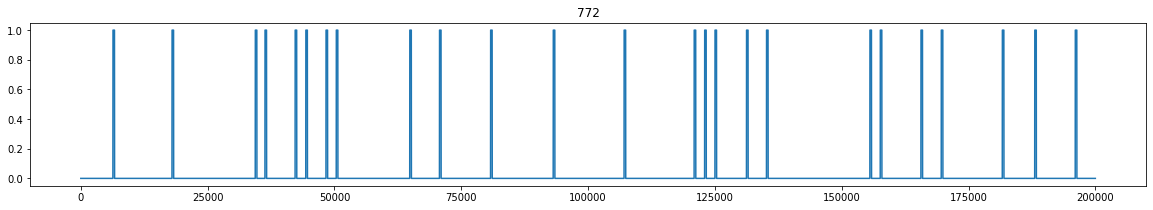

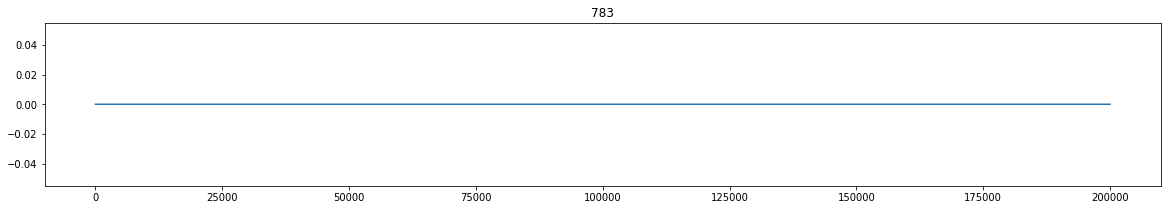

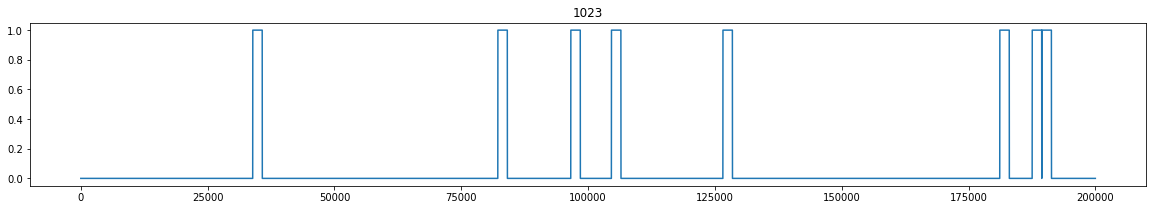

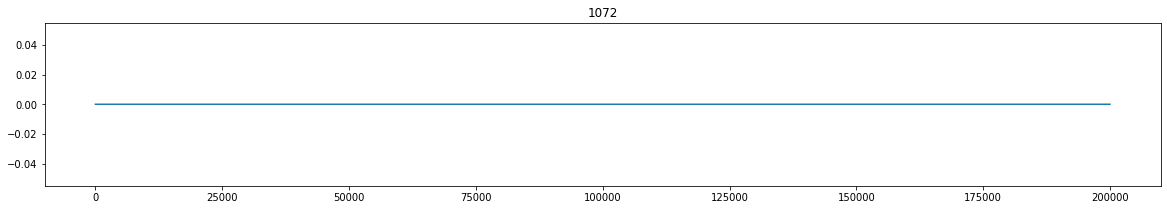

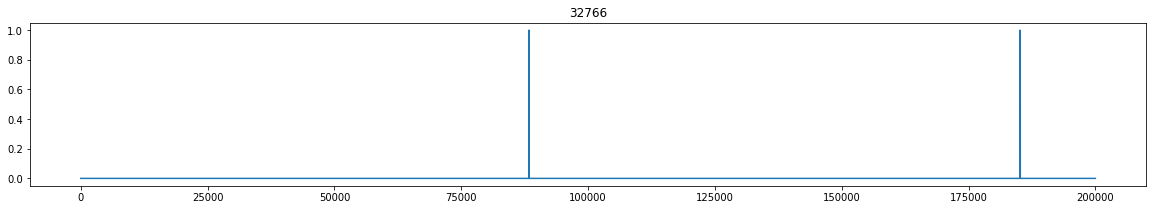

In [248]:
for i in range(11):
    plt.figure(figsize=(20, 3))
    plt.plot(labels[100000:300000, i])
    plt.title(annotation_decode_dict[i])
    plt.show()

In [236]:
import numpy as np
from scipy.stats import chi2_contingency

# def calc_MI(x, y, bins):
#     c_xy = np.histogram2d(x, y, bins)[0]
#     g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
#     mi = 0.5 * g / c_xy.sum()
#     return mi

def mutual_information(X, Y, bins=100):

    minX, maxX = X.min(), X.max()
    minY, maxY = X.min(), X.max()
    range1D = (min(minX, minY), max(maxX, maxY))
    range2D = (range1D, range1D)

    c_XY = np.histogram2d(X,Y,bins, range=range2D)[0]
    c_X = np.histogram(X, bins, range=range1D)[0]
    c_Y = np.histogram(Y, bins, range=range1D)[0]

    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)

    MI = H_X + H_Y - H_XY

    return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

def apply_pairwise(arr, func=mutual_information):
    n = arr.shape[1]
    mi_arr = []
    for i0 in range(n):
        for i1 in range(n):
            if i0 >= i1: continue
            mi_arr.append(func(arr[:, i0], arr[:, i1]))

In [237]:
dir(ica_transform)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_epochs',
 '_apply_evoked',
 '_apply_raw',
 '_check_exclude',
 '_check_n_pca_components',
 '_check_target',
 '_compute_pre_whitener',
 '_do_proj',
 '_export_info',
 '_find_bads_ch',
 '_fit',
 '_fit_epochs',
 '_fit_raw',
 '_get_ctps_threshold',
 '_ica_names',
 '_max_pca_components',
 '_pick_sources',
 '_pre_whiten',
 '_reset',
 '_sources_as_epochs',
 '_sources_as_evoked',
 '_sources_as_raw',
 '_transform',
 '_transform_epochs',
 '_transform_evoked',
 '_transform_raw',
 '_update_ica_names',
 '_update_mixing_matrix',
 'allow_ref_meg',
 'apply',
 'ch_names',
 'compensation_grade',
 'copy',
 'current_fi

In [238]:
help(ica_transform._fit)

Help on method _fit in module mne.preprocessing.ica:

_fit(data, fit_type) method of mne.preprocessing.ica.ICA instance
    Aux function.



In [232]:
gdf_data._data = gdf_data._data[:, :100000]
gdf_data.get_data().shape

(22, 100000)